In [ ]:
import numpy as np


In [ ]:

def logistic_function(x):
    return 1 / (1 + np.exp(-x))

def test_logistic_function():
    """
    Test cases for the logistic_function.
    """

    # Test with scalar input 0
    x_scalar = 0
    expected_output_scalar = 0.5
    assert round(logistic_function(x_scalar), 3) == expected_output_scalar, "Test failed for scalar input 0"

    # Test with positive scalar input
    x_pos = 2
    expected_output_pos = round(1 / (1 + np.exp(-2)), 3)
    assert round(logistic_function(x_pos), 3) == expected_output_pos, "Test failed for positive scalar input"

    # Test with negative scalar input
    x_neg = -3
    expected_output_neg = round(1 / (1 + np.exp(3)), 3)
    assert round(logistic_function(x_neg), 3) == expected_output_neg, "Test failed for negative scalar input"

    # Test with numpy array input
    x_array = np.array([0, 2, -3])
    expected_output_array = np.array([0.5, 0.881, 0.047])
    # Round element-wise and compare
    assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), "Test failed for numpy array input"

    print("All tests passed!")

test_logistic_function()


All tests passed!


In [ ]:


def log_loss(y_true, y_pred):
    """
    Computes log loss for true target value y ∈ {0, 1} and predicted target value y' ∈ [0, 1].

    Arguments:
    y_true (scalar): true target value {0 or 1}.
    y_pred (scalar): predicted target value in [0,1].

    Returns:
    loss (float): log loss value
    """
    # Clip y_pred to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    # Binary log loss formula
    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    return loss


In [ ]:

def log_loss(y_true, y_pred):
    """
    Computes log loss for true target value y ∈ {0, 1} and predicted target value y' ∈ [0, 1].
    """
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)  # avoid log(0)
    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

# Test cases
def test_log_loss():
    """
    Test cases for the log_loss function.
    """

    # Test case 1: Perfect prediction (y_true=1, y_pred=1)
    assert np.isclose(log_loss(1, 1), 0.0), "Failed: y_true=1, y_pred=1"

    # Test case 2: Perfect prediction (y_true=0, y_pred=0)
    assert np.isclose(log_loss(0, 0), 0.0), "Failed: y_true=0, y_pred=0"

    # Test case 3: Incorrect prediction (y_true=1, y_pred=0.8)
    expected_loss = -np.log(0.8)
    assert np.isclose(log_loss(1, 0.8), expected_loss, atol=1e-6), "Failed: y_true=1, y_pred=0.8"

    # Test case 4: Incorrect prediction (y_true=0, y_pred=0.2)
    expected_loss = -np.log(0.8)
    assert np.isclose(log_loss(0, 0.2), expected_loss, atol=1e-6), "Failed: y_true=0, y_pred=0.2"

    # Test case 5: Other examples
    y_true, y_pred = 0, 0.1
    print(f"log_loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}")
    y_true, y_pred = 1, 0.9
    print(f"log_loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}")

    print("All log_loss tests passed!")

test_log_loss()


log_loss(0, 0.1) ==> 0.10536051565782628
log_loss(1, 0.9) ==> 0.10536051565782628
All log_loss tests passed!


In [ ]:


def cost_function(y_true, y_pred):
    """
    Computes log loss (cost) for inputs true values (0 or 1) and predicted values (between 0 and 1)

    Args:
        y_true (array_like, shape (n,)): array of true values (0 or 1)
        y_pred (array_like, shape (n,)): array of predicted probabilities (0-1)

    Returns:
        cost (float): nonnegative average log loss
    """
    # Ensure arrays have the same length
    assert len(y_true) == len(y_pred), "Length of true values and predicted values do not match"

    # Clip y_pred to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    n = len(y_true)

    # Vectorized log loss
    loss_vec = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    # Average cost
    cost = np.mean(loss_vec)

    return cost


In [ ]:


# Logistic (sigmoid) function
def logistic_function(z):
    return 1 / (1 + np.exp(-z))

# Cost function for multiple samples
def cost_function(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    loss_vec = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    cost = np.mean(loss_vec)
    return cost

# Logistic regression cost
def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function for logistic regression.

    Args:
        X (ndarray, shape (m,n)): data with m observations and n features
        y (array_like, shape (m,)): true target values (0 or 1)
        w (array_like, shape (n,)): weight parameters
        b (float): bias term

    Returns:
        cost (float): logistic regression cost
    """
    m, n = X.shape
    assert len(y) == m, "Number of observations and target values do not match."
    assert len(w) == n, "Number of features and weight parameters do not match."

    # Compute linear combination z = X.w + b
    z = np.dot(X, w) + b

    # Apply sigmoid to get predictions
    y_pred = logistic_function(z)

    # Compute cost
    cost = cost_function(y, y_pred)

    return cost


In [ ]:


def logistic_function(z):
    """Sigmoid function"""
    return 1 / (1 + np.exp(-z))

def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function w.r.t model parameters (weights and bias).

    Args:
        X (ndarray, shape (n,d)): Input data, n observations with d features
        y (array_like, shape (n,)): True labels (0 or 1)
        w (array_like, shape (d,)): Weight parameters
        b (float): Bias parameter

    Returns:
        grad_w (ndarray, shape (d,)): Gradient w.r.t weights
        grad_b (float): Gradient w.r.t bias
    """
    n, d = X.shape
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    # Linear combination
    z = np.dot(X, w) + b

    # Predictions
    y_pred = logistic_function(z)

    # Gradients
    error = y_pred - y
    grad_w = np.dot(X.T, error) / n
    grad_b = np.sum(error) / n

    return grad_w, grad_b


In [ ]:


def logistic_function(z):
    return 1 / (1 + np.exp(-z))

def cost_function(y_true, y_pred):
    """Vectorized log loss / cost for logistic regression"""
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)  # avoid log(0)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def compute_gradient(X, y, w, b):
    """Compute gradients of logistic regression cost function"""
    n = X.shape[0]
    z = np.dot(X, w) + b
    y_pred = logistic_function(z)
    error = y_pred - y
    grad_w = np.dot(X.T, error) / n
    grad_b = np.sum(error) / n
    return grad_w, grad_b

def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_w, grad_b = compute_gradient(X, y, w, b)

        # Update weights and bias
        w -= alpha * grad_w
        b -= alpha * grad_b

        # Compute cost
        z = np.dot(X, w) + b
        y_pred = logistic_function(z)
        cost = cost_function(y, y_pred)

        # Store cost and parameters
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Optionally print cost and parameters
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history


In [ ]:

# Sample data and gradient descent parameters
X = np.array([[0.1, 0.2], [-0.1, 0.1]])
y = np.array([1, 0])
w = np.zeros(X.shape[1])
b = 0.0                                   # Scalar
alpha = 0.1                               # Learning rate
n_iter = 100000                           # Number of iterations

# Perform gradient descent
w_out, b_out, cost_history, params_history = gradient_descent(
    X, y, w, b, alpha, n_iter, show_cost=True, show_params=False
)

# Print final parameters and cost
print("\nFinal parameters:")
print(f"w: {w_out}, b: {b_out}")
print(f"Final cost: {cost_history[-1]:.6f}")

# Simple assertion test for gradient_descent
def test_gradient_descent():
    X_test = np.array([[0.1, 0.2], [-0.1, 0.1]])
    y_test = np.array([1, 0])
    w_test = np.zeros(X_test.shape[1])
    b_test = 0.0
    alpha_test = 0.1
    n_iter_test = 100  # smaller for test

    # Run gradient descent
    w_out_test, b_out_test, cost_history_test, _ = gradient_descent(
        X_test, y_test, w_test, b_test, alpha_test, n_iter_test,
        show_cost=False, show_params=False
    )

    # Assertions
    assert len(cost_history_test) == n_iter_test, "Cost history length does not match the number of iterations"
    assert w_out_test.shape == w_test.shape, "Shape of output weights does not match the initial weights"
    assert isinstance(b_out_test, float), "Bias output is not a float"
    assert cost_history_test[-1] < cost_history_test[0], "Cost did not decrease over iterations"

    print("All tests passed!")

test_gradient_descent()


Iteration 0: Cost = 0.692835
Iteration 100: Cost = 0.662662
Iteration 200: Cost = 0.634332
Iteration 300: Cost = 0.607704
Iteration 400: Cost = 0.582671
Iteration 500: Cost = 0.559128
Iteration 600: Cost = 0.536977
Iteration 700: Cost = 0.516126
Iteration 800: Cost = 0.496487
Iteration 900: Cost = 0.477978
Iteration 1000: Cost = 0.460524
Iteration 1100: Cost = 0.444052
Iteration 1200: Cost = 0.428497
Iteration 1300: Cost = 0.413797
Iteration 1400: Cost = 0.399895
Iteration 1500: Cost = 0.386736
Iteration 1600: Cost = 0.374272
Iteration 1700: Cost = 0.362457
Iteration 1800: Cost = 0.351248
Iteration 1900: Cost = 0.340607
Iteration 2000: Cost = 0.330495
Iteration 2100: Cost = 0.320880
Iteration 2200: Cost = 0.311730
Iteration 2300: Cost = 0.303016
Iteration 2400: Cost = 0.294710
Iteration 2500: Cost = 0.286789
Iteration 2600: Cost = 0.279228
Iteration 2700: Cost = 0.272007
Iteration 2800: Cost = 0.265104
Iteration 2900: Cost = 0.258502
Iteration 3000: Cost = 0.252182
Iteration 3100: Cost

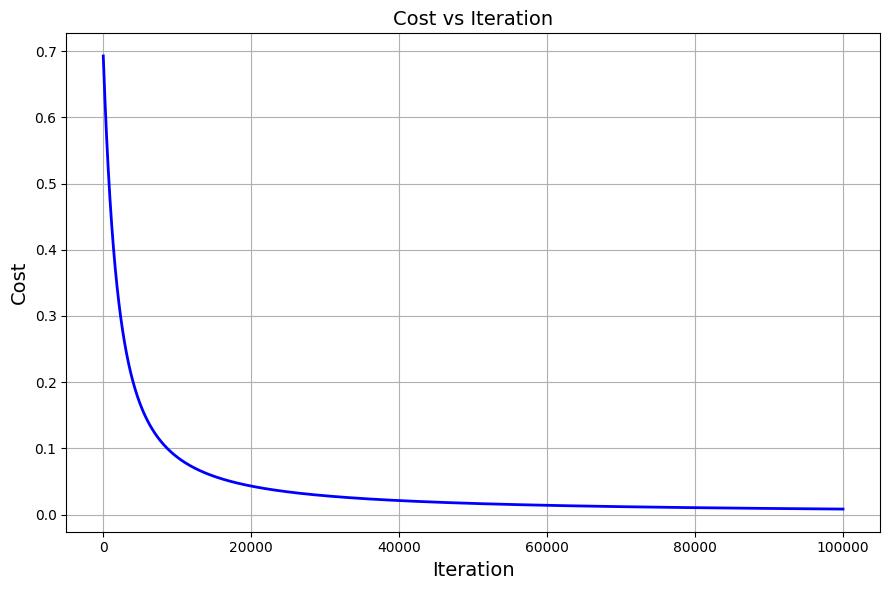

In [ ]:
import matplotlib.pyplot as plt

# Plot cost over iterations
plt.figure(figsize=(9, 6))
plt.plot(cost_history, color='blue', linewidth=2)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.grid(True)  # Optional: adds grid for better visualization
plt.tight_layout()
plt.show()


In [ ]:

# Prediction function
def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.

    Arguments:
    X (ndarray, shape (n,d)): Array of test features with n samples and d features.
    w (ndarray, shape (d,)): Array of weights learned via gradient descent.
    b (float): Bias learned via gradient descent.
    threshold (float, optional): Classification threshold. Default is 0.5.

    Returns:
    y_pred (ndarray, shape (n,)): Array of predicted class labels (0 or 1).
    """
    # Compute z = Xw + b
    z = np.dot(X, w) + b
    # Compute predicted probabilities using sigmoid
    y_prob = 1 / (1 + np.exp(-z))
    # Classify based on threshold
    y_pred = (y_prob >= threshold).astype(int)
    return y_pred

# Simple assertion test for prediction function
def test_prediction():
    X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]])
    w_test = np.array([1.0, -1.0])
    b_test = 0.0
    threshold = 0.5

    # Expected output
    expected_output = np.array([0, 1, 1])

    # Call the prediction function
    y_pred = prediction(X_test, w_test, b_test, threshold)

    # Assertion
    assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"
    print("Test passed!")

test_prediction()


Test passed!


In [ ]:

def evaluate_classification(y_true, y_pred):
    """
    Computes the confusion matrix, precision, recall, and F1-score for binary classification.

    Arguments:
    y_true (ndarray, shape (n,)): Ground truth binary labels (0 or 1).
    y_pred (ndarray, shape (n,)): Predicted binary labels (0 or 1).

    Returns:
    metrics (dict): A dictionary containing confusion matrix, precision, recall, and F1-score.
    """
    # Initialize confusion matrix components
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    # Confusion matrix
    confusion_matrix = np.array([[TN, FP],
                                 [FN, TP]])

    # Precision, recall, and F1-score
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    # Metrics dictionary
    metrics = {
        "confusion_matrix": confusion_matrix,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }

    return metrics


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load Dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
           'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

In [ ]:
# Data Cleaning
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_to_clean] = data[columns_to_clean].replace(0, np.nan)
data.fillna(data.median(), inplace=True)


In [ ]:
# Train-Test Split and Standard Scaling
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [ ]:
# Logistic loss (cost)
def costfunction_logreg(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    cost = -np.mean(y * np.log(y_hat + 1e-8) + (1 - y) * np.log(1 - y_hat + 1e-8))
    return cost

In [ ]:
# Gradient Descent
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=False):
    m = X.shape[0]
    cost_history = []
    params_history = []

    for i in range(n_iter):
        z = np.dot(X, w) + b
        y_hat = sigmoid(z)

        dw = np.dot(X.T, (y_hat - y)) / m
        db = np.sum(y_hat - y) / m

        w -= alpha * dw
        b -= alpha * db

        cost = costfunction_logreg(X, y, w, b)
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        if show_cost and i % (n_iter//10) == 0:
            print(f"Iteration {i}: Cost {cost:.6f}")
        if show_params and i % (n_iter//10) == 0:
            print(f"w: {w}, b: {b}")

    return w, b, cost_history, params_history

In [ ]:
# Prediction
def prediction(X, w, b, threshold=0.5):
    z = np.dot(X, w) + b
    y_prob = sigmoid(z)
    return (y_prob >= threshold).astype(int)

In [ ]:
# Evaluation
def evaluate_classification(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    confusion_matrix = np.array([[TN, FP],
                                 [FN, TP]])

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    return confusion_matrix, precision, recall, f1_score

In [ ]:
# Training the Model
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000

In [ ]:
print("\nTraining Logistic Regression Model:")
w, b, cost_history, params_history = gradient_descent(
    X_train_scaled, y_train, w, b, alpha, n_iter, show_cost=True, show_params=False
)



Training Logistic Regression Model:
Iteration 0: Cost 0.676575
Iteration 100: Cost 0.465441
Iteration 200: Cost 0.455913
Iteration 300: Cost 0.453874
Iteration 400: Cost 0.453316
Iteration 500: Cost 0.453148
Iteration 600: Cost 0.453096
Iteration 700: Cost 0.453079
Iteration 800: Cost 0.453073
Iteration 900: Cost 0.453072


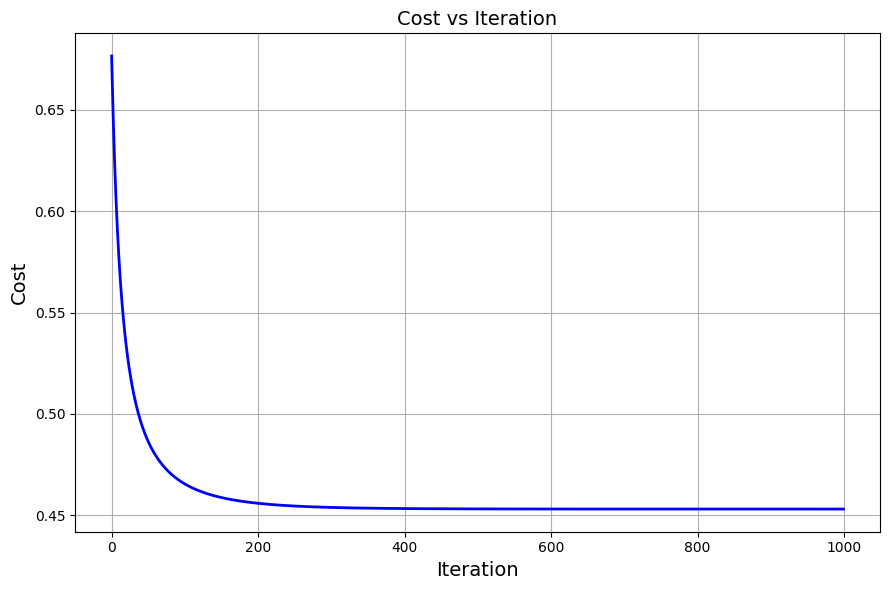

In [ ]:
# Plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history, color='blue', linewidth=2)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Evaluate Train and Test Performance
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)

train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)

print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.4531
Test Loss (Cost): 0.5146


In [ ]:
# Evaluation Metrics
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

conf_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred)
print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


Test Accuracy: 70.78%

Confusion Matrix:
[[82 18]
 [27 27]]
Precision: 0.60
Recall: 0.50
F1-Score: 0.55
